# FAKE NEWS DETECTION

In [69]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
import itertools

In [33]:
df = pd.read_csv('news.csv')

In [34]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [35]:
print(df)

      Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinter

In [36]:
df.shape

(6335, 4)

In [37]:
#naming the unnamed column as id
df.rename(columns={'Unnamed: 0' : 'id'},inplace=True)

In [38]:
print(df.head())

      id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [39]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [40]:
label_maping = {
    "REAL": 0,
    "FAKE": 1
}
df["label"] = df["label"].map(label_maping)

In [41]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [477]:
#checking for null values
df.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [43]:
df.head(10)

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",1
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",1
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,0
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,0
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,0


In [478]:
#storing the label in y
X = df.drop("label",axis = 1)
y = df["label"]

In [45]:
X.head()

,id,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [46]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: label, dtype: int64

In [47]:
ps = PorterStemmer()

In [51]:
import nltk
nltk.download('stopwords')
corpus = []
for i in range(0,len(df)):
  rep = re.sub('[^a-zA-Z]',' ',df['title'][i])
  rep = rep.lower()
  rep = rep.split()

  rep = [ps.stem(word) for word in rep if not word in stopwords.words('english')]
  rep = ' '.join(rep)
  corpus.append(rep)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [52]:
corpus

['smell hillari fear',
 'watch exact moment paul ryan commit polit suicid trump ralli video',
 'kerri go pari gestur sympathi',
 'berni support twitter erupt anger dnc tri warn',
 'battl new york primari matter',
 'tehran usa',
 'girl horrifi watch boyfriend left facetim',
 'britain schindler die',
 'fact check trump clinton command chief forum',
 'iran reportedli make new push uranium concess nuclear talk',
 'three clinton iowa glimps fire elud hillari clinton campaign',
 'donald trump shockingli weak deleg game somehow got even wors',
 'strong solar storm tech risk today news oct video',
 'way america prepar world war',
 'trump take cruz lightli',
 'women lead differ',
 'shock michel obama hillari caught glamor date rape promot',
 'hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news',
 'iran bill obama like',
 'chart explain everyth need know partisanship america',
 'slipperi slope trump propos ban muslim',
 'episod sunday wire hail deplor special g

In [377]:
#TFidf Vectorizer
tfidf_vec = TfidfVectorizer(max_features = 6000,ngram_range=(1,3))
X = tfidf_vec.fit_transform(corpus).toarray()

In [378]:
X.shape

(6335, 6000)

In [390]:
#splitting the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [391]:
tfidf_vec.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abdullah', 'abedin',
       'abedin weiner', 'abedin weiner laptop', 'abil', 'aboard',
       'abolish', 'abort', 'abort answer', 'abort measur', 'absente',
       'absente vote', 'absolut', 'abstain', 'abstain un',
       'abstain un vote', 'absurd'], dtype=object)

In [392]:
tfidf_vec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [393]:
count_df = pd.DataFrame(X_train,columns = tfidf_vec.get_feature_names_out())

In [394]:
count_df.head()

,abandon,abc,abc news,abdullah,abedin,abedin weiner,abedin weiner laptop,abil,aboard,abolish,...,zika scaremong,zika scaremong washington,zika viru,zika viru caus,zika viru harmless,zionist,zionist stoog,zone,zuckerberg,zuess
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [395]:
#plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [471]:
#Passive Agressive Classifier Algo


model = PassiveAggressiveClassifier(n_iter_no_change=6)

In [472]:
model.fit(X_train,y_train)

PassiveAggressiveClassifier(n_iter_no_change=6)

In [473]:
#predicting
predictions = model.predict(X_test)

In [479]:
#Evaluating the model
score = metrics.accuracy_score(y_test,predictions)
print(f"Accuracy: {score}")

Accuracy: 0.7980010520778538


In [475]:
#creating confusing matrix
matrix = metrics.confusion_matrix(y_test,predictions)

Confusion matrix, without normalization


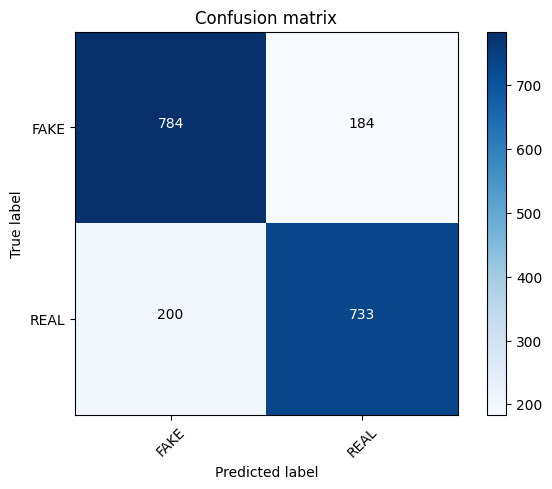

In [476]:
plot_confusion_matrix(matrix,classes = ["FAKE", "REAL"])